# Application Project Milestone 2

## 4. Performance Comparison

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import ttest_rel

In [2]:
# Load the model
loaded_ridge = joblib.load("models/best_ridge_model.pkl")
loaded_rf = joblib.load("models/best_rf_model.pkl")
loaded_mlp = joblib.load("models/best_mlp_model.pkl")

# Show the parameters of the model
print("Ridge parameters:")
print(loaded_ridge)
print("Random Forest parameters:")
print(loaded_rf)
print("MLP parameters:")
print(loaded_mlp)

Ridge parameters:
Ridge()
Random Forest parameters:
RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)
MLP parameters:
MLPRegressor(activation='tanh', hidden_layer_sizes=(50,), random_state=42,
             solver='lbfgs')


In [3]:
# Load the data
X_train_raw = pd.read_csv('./Raw_features/X_train.csv')
y_train_raw = pd.read_csv('Raw_features/y_train.csv')
X_test_raw  = pd.read_csv('Raw_features/X_test.csv')
y_test_raw  = pd.read_csv('Raw_features/y_test.csv')

X_train_handle = pd.read_csv('Handle_selected_features/X_train.csv')
y_train_handle = pd.read_csv('Handle_selected_features/Y_train.csv')
X_test_handle  = pd.read_csv('Handle_selected_features/X_test.csv')
y_test_handle  = pd.read_csv('Handle_selected_features/Y_test.csv')

X_train_cluster = pd.read_csv('Cluster_based_features/X_cluster_train.csv')
y_train_cluster = pd.read_csv('Cluster_based_features/Y_cluster_train.csv')
X_test_cluster  = pd.read_csv('Cluster_based_features/X_cluster_test.csv')
y_test_cluster  = pd.read_csv('Cluster_based_features/Y_cluster_test.csv')

X_train_pca_2 = pd.read_csv('PCA_transformed_features/X_train_pca.csv')
y_train_pca_2 = pd.read_csv('PCA_transformed_features/y_train_pca.csv')
X_test_pca_2  = pd.read_csv('PCA_transformed_features/X_test_pca.csv')
y_test_pca_2  = pd.read_csv('PCA_transformed_features/y_test_pca.csv')

X_train_pca_opt = pd.read_csv('PCA_transformed_features/X_train_pca_opt.csv')
y_train_pca_opt = pd.read_csv('PCA_transformed_features/y_train_pca_opt.csv')
X_test_pca_opt  = pd.read_csv('PCA_transformed_features/X_test_pca_opt.csv')
y_test_pca_opt  = pd.read_csv('PCA_transformed_features/y_test_pca_opt.csv')

### 4.1 Cross Validation

In [4]:
# Define a Helper Function to Run 10-Fold CV and Return MSE & R^2

def run_cv_and_get_metrics(X, y, kf):
    """
    Returns two arrays of length kf.n_splits:
      - fold_mses:  the MSE for each fold
      - fold_r2s:   the R^2 for each fold
    """
    fold_mses = []
    fold_r2s = []
    
    for train_index, val_index in kf.split(X):
        X_tr, X_val = X[train_index], X[val_index]
        y_tr, y_val = y[train_index], y[val_index]
        
        # Example MLP architecture; you can tune as needed
        model = MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                             activation='relu',
                             solver='adam',
                             max_iter=1000,
                             random_state=0)
        
        # Train on this fold’s training subset
        model.fit(X_tr, y_tr)
        
        # Evaluate on this fold’s validation subset
        y_pred = model.predict(X_val)
        
        # Compute MSE and R^2
        fold_mses.append(mean_squared_error(y_val, y_pred))
        fold_r2s.append(r2_score(y_val, y_pred))
        
    return np.array(fold_mses), np.array(fold_r2s)


In [5]:
# Set up the SAME 10-Fold Splitter for All Feature Sets
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [6]:
# Run CV for Each Feature Set and Gather MSE & R^2
raw_mses,     raw_r2s     = run_cv_and_get_metrics(X_train_raw.values, y_train_raw.values.ravel(), kf)
handle_mses,  handle_r2s  = run_cv_and_get_metrics(X_train_handle.values, y_train_handle.values.ravel(), kf)
cluster_mses, cluster_r2s = run_cv_and_get_metrics(X_train_cluster.values, y_train_cluster.values.ravel(), kf)
pca_mses,     pca_r2s     = run_cv_and_get_metrics(X_train_pca_2.values, y_train_pca_2.values.ravel(), kf)
pca_opt_mses, pca_opt_r2s = run_cv_and_get_metrics(X_train_pca_opt.values, y_train_pca_opt.values.ravel(), kf)

In [7]:
# Compute Mean MSE and Mean R^2 Across the 10 Folds
mean_raw_mse     = raw_mses.mean()
mean_handle_mse  = handle_mses.mean()
mean_cluster_mse = cluster_mses.mean()
mean_pca_mse     = pca_mses.mean()
mean_pca_opt_mse = pca_opt_mses.mean()

mean_raw_r2     = raw_r2s.mean()
mean_handle_r2  = handle_r2s.mean()
mean_cluster_r2 = cluster_r2s.mean()
mean_pca_r2     = pca_r2s.mean()
mean_pca_opt_r2 = pca_opt_r2s.mean()

In [8]:
# Print them out
print("== Mean MSE ==")
print(f"Raw:       {mean_raw_mse:.4f}")
print(f"Handle:    {mean_handle_mse:.4f}")
print(f"Cluster:   {mean_cluster_mse:.4f}")
print(f"PCA:       {mean_pca_mse:.4f}")
print(f"PCA Opt:   {mean_pca_opt_mse:.4f}")

print("\n== Mean R^2 ==")
print(f"Raw:       {mean_raw_r2:.4f}")
print(f"Handle:    {mean_handle_r2:.4f}")
print(f"Cluster:   {mean_cluster_r2:.4f}")
print(f"PCA:       {mean_pca_r2:.4f}")
print(f"PCA Opt:   {mean_pca_opt_r2:.4f}")

== Mean MSE ==
Raw:       0.0312
Handle:    0.0705
Cluster:   0.0966
PCA:       0.0913
PCA Opt:   0.0349

== Mean R^2 ==
Raw:       0.7950
Handle:    0.5723
Cluster:   0.4123
PCA:       0.4019
PCA Opt:   0.7708


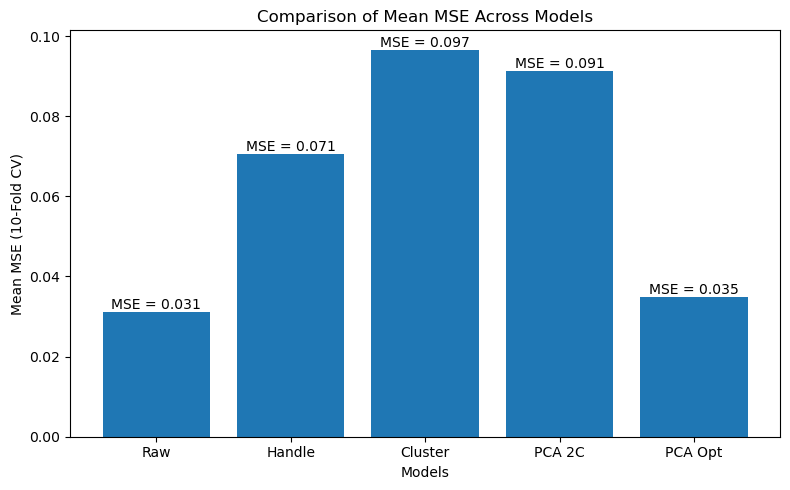

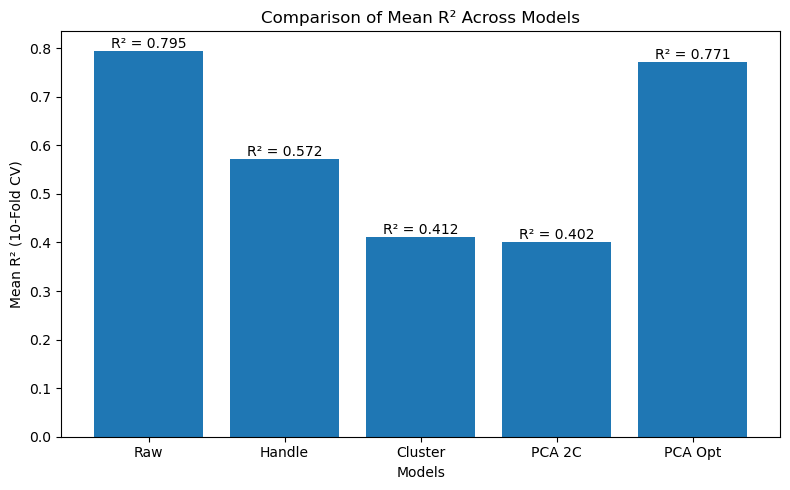

In [9]:
model_names = ["Raw", "Handle", "Cluster", "PCA 2C", "PCA Opt"]
mean_mses = [mean_raw_mse, mean_handle_mse, mean_cluster_mse, mean_pca_mse, mean_pca_opt_mse]
mean_r2s  = [mean_raw_r2,  mean_handle_r2,  mean_cluster_r2,  mean_pca_r2, mean_pca_opt_r2]

# --- Bar chart for MSE ---
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mean_mses)
plt.xlabel("Models")
plt.ylabel("Mean MSE (10-Fold CV)")
plt.title("Comparison of Mean MSE Across Models")

# Add numerical value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'MSE = {height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- Bar chart for R² ---
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mean_r2s)
plt.xlabel("Models")
plt.ylabel("Mean R² (10-Fold CV)")
plt.title("Comparison of Mean R² Across Models")

# Add numerical value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'R² = {height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Test the models on the test set
ridge_pred = loaded_ridge.predict(X_test_raw)
rf_pred = loaded_rf.predict(X_test_raw)
mlp_pred = loaded_mlp.predict(X_test_raw)

ridge_mse = mean_squared_error(y_test_raw, ridge_pred)
ridge_r2 = r2_score(y_test_raw, ridge_pred)
rf_mse = mean_squared_error(y_test_raw, rf_pred)
rf_r2 = r2_score(y_test_raw, rf_pred)
mlp_mse = mean_squared_error(y_test_raw, mlp_pred)
mlp_r2 = r2_score(y_test_raw, mlp_pred)

print("Ridge MSE: ", ridge_mse)
print("Ridge R²: ", ridge_r2)
print("RF MSE: ", rf_mse)
print("RF R²: ", rf_r2)
print("MLP MSE: ", mlp_mse)
print("MLP R²: ", mlp_r2)

### 4.2 T-test

In [14]:
# Identify Best Model and Paired t-test vs. Baseline (Raw)
# Decide your primary metric for "best", e.g., MSE or R^2
# remove raw from the list of models
# model_names.remove("Raw")
# mean_mses.remove(mean_raw_mse)
# mean_r2s.remove(mean_raw_r2)
mean_mses_array = np.array(mean_mses)
best_idx = mean_mses_array.argmin()
best_model_name = model_names[best_idx]
print(f"\nBest model (lowest mean CV MSE): {best_model_name} with MSE={mean_mses[best_idx]:.4f}")


Best model (lowest mean CV MSE): PCA Opt with MSE=0.0349


In [11]:
# If the best is not Raw, do a paired t-test of fold-wise MSE vs. Raw's fold-wise MSE
if best_model_name != "Raw":
    # Gather the fold-wise MSE arrays for baseline (Raw) vs. best model
    baseline_mses = raw_mses
    if best_model_name == "Handle":
        best_mses = handle_mses
    elif best_model_name == "Cluster":
        best_mses = cluster_mses
    else:
        best_mses = pca_mses
    
    # Paired t-test
    t_stat, p_value = ttest_rel(baseline_mses, best_mses)
    print("\nPaired t-test comparing best model vs. Raw (fold-wise MSE):")
    print("t-statistic:", t_stat)
    print("p-value:    ", p_value)
    
    if p_value < 0.05:
        print("=> The difference is statistically significant at the 5% level.")
    else:
        print("=> The difference is not statistically significant at the 5% level.")
else:
    print("\nBest model is the Raw model, so no t-test needed.")


Best model is the Raw model, so no t-test needed.
